In [41]:
import joblib
import matplotlib.pyplot as plt

In [2]:
Envelope = joblib.load('Envelope.joblib')

In [3]:
Envelope['S1_HC_1']

,M1,M2,M3,M4,M5,M6,M7,M8
0,0.000141,0.000113,0.000070,0.000045,0.000239,0.000335,0.000465,0.000499
1,0.000146,0.000114,0.000070,0.000048,0.000245,0.000338,0.000487,0.000501
2,0.000151,0.000115,0.000071,0.000051,0.000250,0.000340,0.000509,0.000503
3,0.000156,0.000116,0.000072,0.000054,0.000255,0.000342,0.000530,0.000505
4,0.000161,0.000117,0.000073,0.000057,0.000261,0.000344,0.000550,0.000507
...,...,...,...,...,...,...,...,...
79995,0.000144,0.000144,0.000027,0.000089,0.000244,0.000155,0.000381,0.000355
79996,0.000144,0.000144,0.000027,0.000089,0.000243,0.000155,0.000380,0.000354
79997,0.000143,0.000144,0.000027,0.000089,0.000243,0.000154,0.000380,0.000353
79998,0.000143,0.000144,0.000027,0.000089,0.000242,0.000154,0.000379,0.000352


In [8]:
MovementClasses = {'T_T':1,'I_I':2,'M_M':3,'R_R':4,'L_L':5,'T_I':6,'T_M':7,'T_R':8,'T_L':9,'I_M':10,'M_R':11,'R_L':12,'IMR':13,'MRL':14,'HC_':15}

In [6]:
Envelope.keys()

dict_keys(['S1_T_T1', 'S1_I_I1', 'S1_M_M1', 'S1_R_R1', 'S1_L_L1', 'S1_T_I1', 'S1_T_M1', 'S1_T_R1', 'S1_T_L1', 'S1_I_M1', 'S1_M_R1', 'S1_R_L1', 'S1_IMR1', 'S1_MRL1', 'S1_HC_1', 'S1_T_T2', 'S1_I_I2', 'S1_M_M2', 'S1_R_R2', 'S1_L_L2', 'S1_T_I2', 'S1_T_M2', 'S1_T_R2', 'S1_T_L2', 'S1_I_M2', 'S1_M_R2', 'S1_R_L2', 'S1_IMR2', 'S1_MRL2', 'S1_HC_2', 'S1_T_T3', 'S1_I_I3', 'S1_M_M3', 'S1_R_R3', 'S1_L_L3', 'S1_T_I3', 'S1_T_M3', 'S1_T_R3', 'S1_T_L3', 'S1_I_M3', 'S1_M_R3', 'S1_R_L3', 'S1_IMR3', 'S1_MRL3', 'S1_HC_3', 'S2_T_T1', 'S2_I_I1', 'S2_M_M1', 'S2_R_R1', 'S2_L_L1', 'S2_T_I1', 'S2_T_M1', 'S2_T_R1', 'S2_T_L1', 'S2_I_M1', 'S2_M_R1', 'S2_R_L1', 'S2_IMR1', 'S2_MRL1', 'S2_HC_1', 'S2_T_T2', 'S2_I_I2', 'S2_M_M2', 'S2_R_R2', 'S2_L_L2', 'S2_T_I2', 'S2_T_M2', 'S2_T_R2', 'S2_T_L2', 'S2_I_M2', 'S2_M_R2', 'S2_R_L2', 'S2_IMR2', 'S2_MRL2', 'S2_HC_2', 'S2_T_T3', 'S2_I_I3', 'S2_M_M3', 'S2_R_R3', 'S2_L_L3', 'S2_T_I3', 'S2_T_M3', 'S2_T_R3', 'S2_T_L3', 'S2_I_M3', 'S2_M_R3', 'S2_R_L3', 'S2_IMR3', 'S2_MRL3', 'S2_HC_3',

In [9]:
def extract_sort_key(key, movement_classes):
    parts = key
    subject_num = int(parts[1])  # 'S1' -> 1
    movement = (parts[3:6]) 
    trial = int(parts[-1])  # e.g., '1'
    movement_order = movement_classes.get(movement, 999)
    return (subject_num, trial,movement_order)  # <--- TRIAL comes before movement

sorted_keys = sorted(
    Envelope.keys(),
    key=lambda k: extract_sort_key(k, MovementClasses)
)

SortedEnv = {
    key: Envelope[key] for key in sorted_keys
}

In [10]:
Subject1list = sorted_keys[:45]

In [36]:
S1trial1 = sorted_keys[:15]

In [11]:
def flatten(array_2d):
    return [item for row in array_2d for item in row]

In [22]:
from sklearn.decomposition import NMF
NNMF = NMF(n_components=2,init = 'random' ,max_iter=5000,random_state = 0)

In [23]:
def calculate_vaf(V, W, H):
    V_hat = np.dot(W, H)
    return 1 - (np.linalg.norm(V - V_hat) ** 2) / (np.linalg.norm(V) ** 2)

In [24]:
DataList = []
for name in Subject1list:
    E = Envelope[name].T
    W = NNMF.fit_transform(E)
    w = flatten(W)
    DataList.append(w)

In [25]:
labelcol = []
for name in Subject1list:
    if name[3:6] in MovementClasses.keys():
        labelcol.append(MovementClasses[name[3:6]])

In [26]:
import pandas as pd

In [27]:
DF = pd.DataFrame(DataList)

In [28]:
DF['Target'] = labelcol

In [29]:
DF

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,Target
0,0.021076,0.006873,0.005732,0.004984,0.002528,0.001699,0.002163,0.004475,0.003244,0.014451,0.004482,0.011923,0.003572,0.004780,0.008210,0.005573,1
1,0.024283,0.008956,0.009021,0.005673,0.001699,0.002015,0.002502,0.002024,0.002391,0.004984,0.002391,0.012128,0.003375,0.004053,0.008860,0.005351,2
2,0.028128,0.011984,0.006090,0.005210,0.001819,0.002367,0.003922,0.005411,0.002805,0.006284,0.001138,0.006219,0.003060,0.003062,0.009762,0.005974,3
3,0.021120,0.003776,0.009320,0.003890,0.001977,0.001905,0.004499,0.009384,0.005946,0.018318,0.006688,0.010828,0.003469,0.003499,0.007786,0.004898,4
4,0.025906,0.007735,0.006573,0.006532,0.001891,0.002830,0.001143,0.017940,0.001091,0.014190,0.002867,0.011098,0.003114,0.006510,0.007147,0.003816,5
5,0.034620,0.011868,0.011720,0.008060,0.002033,0.002265,0.002401,0.002514,0.003639,0.005480,0.002458,0.013010,0.002886,0.004911,0.009544,0.006164,6
6,0.035944,0.015091,0.008177,0.006750,0.002359,0.002720,0.004811,0.006522,0.004693,0.008289,0.001655,0.009356,0.003298,0.003690,0.011364,0.010513,7
7,0.028435,0.007212,0.014070,0.005289,0.002257,0.001701,0.004671,0.006780,0.010436,0.028030,0.009752,0.015987,0.007807,0.007675,0.011178,0.005993,8
8,0.009949,0.030612,0.004773,0.008406,0.001584,0.002494,0.003824,0.008207,0.006956,0.013648,0.010053,0.005764,0.047344,0.010412,0.016977,0.008420,9
9,0.035558,0.013269,0.007703,0.004923,0.002067,0.002171,0.003268,0.003145,0.002622,0.005749,0.003827,0.013363,0.004045,0.004764,0.012733,0.007685,10


In [35]:
import numpy as np
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

X = DF.iloc[:, :-1]  
y = DF.iloc[:, -1] 

# Set up k-fold cross-validation
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Initialize classifiers
classifiers = {
    "ETC": ExtraTreesClassifier(random_state=42),
}

# Evaluate each classifier
for name, clf in classifiers.items():
    scores = cross_val_score(clf, X, y, cv=kf, scoring='accuracy')
    print(f'{name} scores over the 5 folds: {scores}')
    print(f"{name} Mean Accuracy: {np.mean(scores):.4f} ± {np.std(scores):.4f}\n")

ETC scores over the 5 folds: [0.77777778 1.         1.         1.         0.88888889]
ETC Mean Accuracy: 0.9333 ± 0.0889



In [43]:
def extract_normalized_synergies(emg_data, n_components=2):
    """
    Perform NMF on EMG data and return normalized W matrix
    """
    # NMF expects (n_samples, n_features), so we transpose
    # Our data: (8 muscles, 80000 timepoints) -> (80000, 8) for NMF
    nmf = NMF(n_components=n_components, random_state=42, max_iter=5000)
    W = nmf.fit_transform(emg_data) 
     
    
    # We want the muscle synergies, so we use H.T which is (8, 2)
    W_synergies = W  # Shape: (8 muscles, 3 synergies)
    
    # Normalize each synergy vector (each column)
    W_normalized = np.zeros_like(W_synergies)
    for synergy_idx in range(n_components):
        synergy_vector = W_synergies[:, synergy_idx]
        # L2 normalization
        norm = np.linalg.norm(synergy_vector)
        if norm > 0:
            W_normalized[:, synergy_idx] = synergy_vector / norm
        else:
            W_normalized[:, synergy_idx] = synergy_vector
    
    return W_normalized

Processing Gesture 1...
Processing Gesture 2...
Processing Gesture 3...
Processing Gesture 4...
Processing Gesture 5...
Processing Gesture 6...
Processing Gesture 7...
Processing Gesture 8...
Processing Gesture 9...
Processing Gesture 10...
Processing Gesture 11...
Processing Gesture 12...
Processing Gesture 13...
Processing Gesture 14...
Processing Gesture 15...


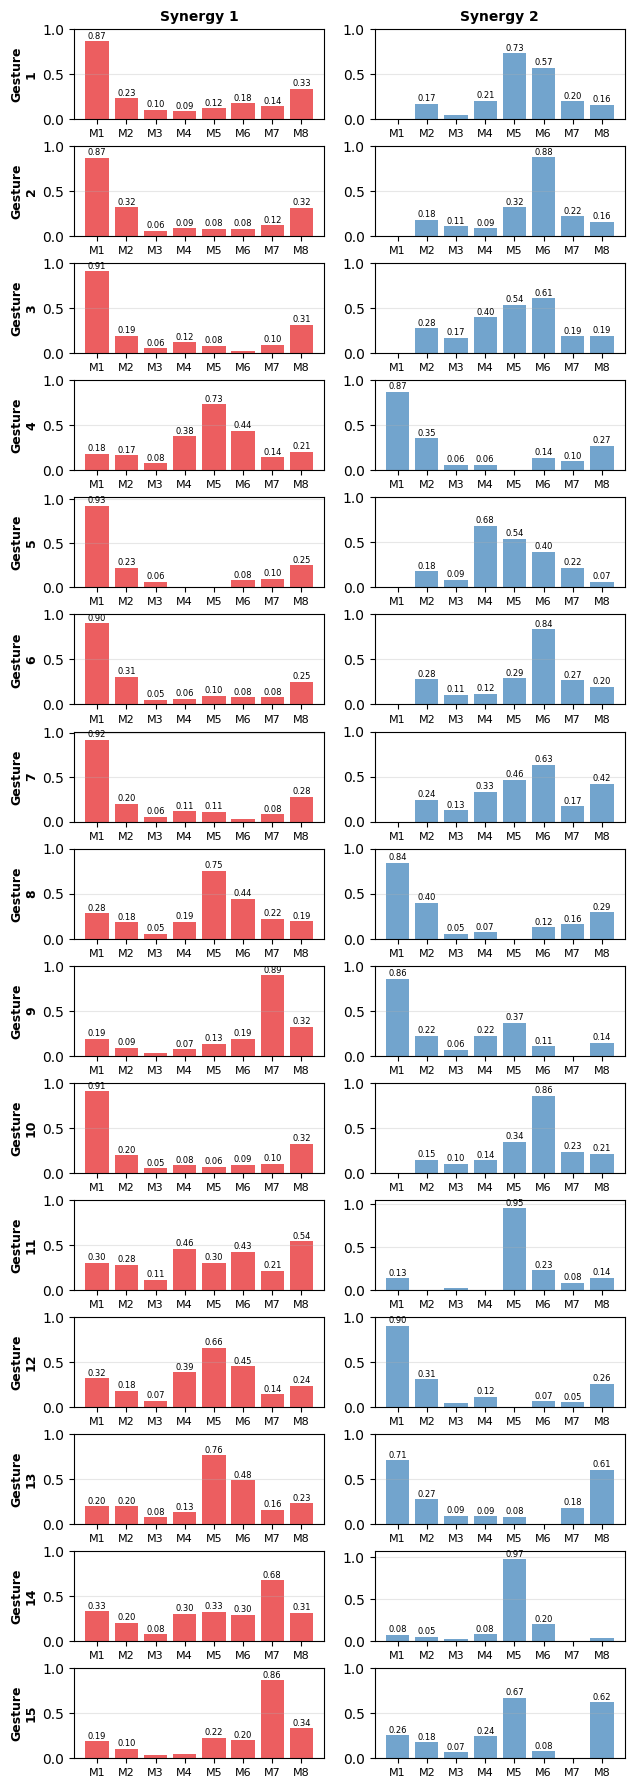

In [47]:


# Parameters
num_gestures = 15
num_muscles = 8
num_timepoints = 80000
num_synergies = 2

# Muscle names for labeling
muscle_names = ['Muscle 1', 'Muscle 2', 'Muscle 3', 'Muscle 4', 
                'Muscle 5', 'Muscle 6', 'Muscle 7', 'Muscle 8']

# Create the subplot figure
fig_width = 6.4  # inches
fig_height_per_gesture = 1.2  # adjust per row for readability
fig_height = fig_height_per_gesture * num_gestures  # total height

fig, axes = plt.subplots(num_gestures, num_synergies, figsize=(fig_width, fig_height))

# fig.suptitle('Normalized Synergy Vectors - Subject 1, Trial 1', fontsize=16, y=0.995)

# Process each gesture
for gesture_idx in range(num_gestures):
    print(f"Processing Gesture {gesture_idx + 1}...")
    
    # Load EMG data for this gesture
    emg_data = Envelope[S1trial1[gesture_idx]].T
    
    # Extract normalized synergies
    W_normalized = extract_normalized_synergies(emg_data, num_synergies)
    
    # Plot each synergy vector
    for synergy_idx in range(num_synergies):
        ax = axes[gesture_idx, synergy_idx]
        
        # Get the synergy vector
        synergy_vector = W_normalized[:, synergy_idx]
        
        # Create bar plot
        bars = ax.bar(range(num_muscles), synergy_vector, 
                     color=plt.cm.Set1(synergy_idx), alpha=0.7)
        
        # Customize the subplot
        ax.set_ylim(0, max(1.0, np.max(synergy_vector) * 1.1))
        ax.set_xticks(range(num_muscles))
        ax.set_xticklabels([f'M{i+1}' for i in range(num_muscles)], fontsize=8)
        # ax.set_ylabel('Normalized\nWeight', fontsize=8)
        
        # Add title only for the first row
        if gesture_idx == 0:
            ax.set_title(f'Synergy {synergy_idx + 1}', fontsize=10, fontweight='bold')
        
        # Add gesture label only for the first column
        if synergy_idx == 0:
            ax.text(-0.2, 0.5, f'Gesture\n{gesture_idx + 1}', 
                   transform=ax.transAxes, fontsize=9, fontweight='bold',
                   ha='center', va='center', rotation=90)
        
        # Grid for better readability
        ax.grid(True, alpha=0.3, axis='y')
        
        # Add value labels on bars (optional)
        for i, bar in enumerate(bars):
            height = bar.get_height()
            if height > 0.05:  # Only label bars with significant height
                ax.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                       f'{height:.2f}', ha='center', va='bottom', fontsize=6)

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.98, hspace=0.3, wspace=0.2)

# Save the figure
plt.savefig('nmf_synergies_all_gestures.png', dpi=300, bbox_inches='tight')
plt.show()

# # Optional: Create a summary plot showing dominant muscles per synergy per gesture
# fig_summary, ax_summary = plt.subplots(figsize=(12, 8))

# # Create a matrix to show dominant muscle for each synergy of each gesture
# dominant_muscles = np.zeros((num_gestures, num_synergies))

# for gesture_idx in range(num_gestures):
#     emg_data = Envelope[S1trial1[gesture_idx]].T
#     W_normalized = extract_normalized_synergies(emg_data, num_synergies)
    
#     for synergy_idx in range(num_synergies):
#         # Find the muscle with maximum weight in this synergy
#         dominant_muscle = np.argmax(W_normalized[:, synergy_idx])
#         dominant_muscles[gesture_idx, synergy_idx] = dominant_muscle

# # Plot the heatmap
# im = ax_summary.imshow(dominant_muscles, cmap='tab10', aspect='auto')
# ax_summary.set_xlabel('Synergy Vector')
# ax_summary.set_ylabel('Gesture')
# ax_summary.set_title('Dominant Muscle per Synergy Vector')
# ax_summary.set_xticks(range(num_synergies))
# ax_summary.set_xticklabels([f'Synergy {i+1}' for i in range(num_synergies)])
# ax_summary.set_yticks(range(num_gestures))
# ax_summary.set_yticklabels([f'Gesture {i+1}' for i in range(num_gestures)])

# # Add colorbar
# cbar = plt.colorbar(im, ax=ax_summary)
# cbar.set_ticks(range(num_muscles))
# cbar.set_ticklabels([f'M{i+1}' for i in range(num_muscles)])
# cbar.set_label('Dominant Muscle')

# plt.tight_layout()
# plt.savefig('dominant_muscles_summary.png', dpi=300, bbox_inches='tight')
# plt.show()

# print("Analysis complete! Plots saved as 'nmf_synergies_all_gestures.png' and 'dominant_muscles_summary.png'")

=== ETC Results ===
ETC scores over the 5 folds: [0.78 1.   1.   1.   0.89]
ETC Mean Accuracy: 0.9333 ± 0.0889
ETC Overall Accuracy: 0.9333

ETC Raw Confusion Matrix:
[[3 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 3 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 3 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 3 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 3 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 3 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 3 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 3 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 2 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 3 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 3 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 2 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 3 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 3 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 2]]


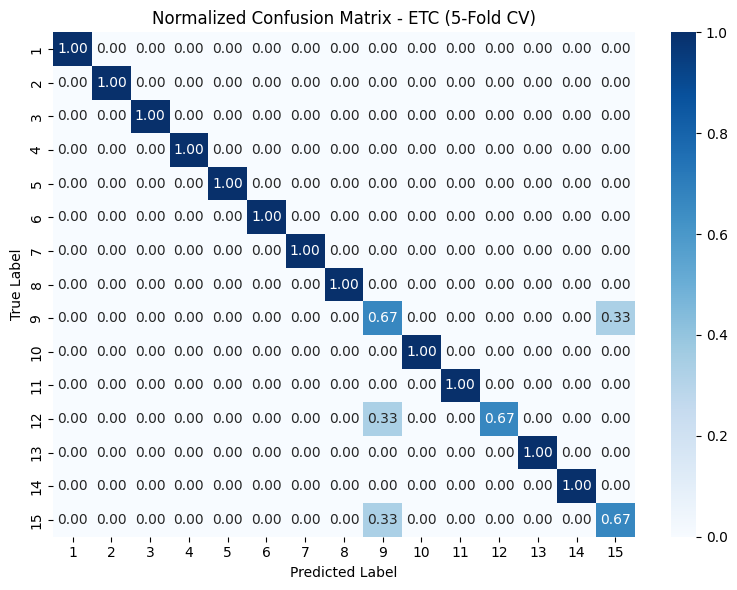


ETC Normalized Confusion Matrix (up to 2 decimal places):
[[1.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.  ]
 [0.   1.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.  ]
 [0.   0.   1.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.  ]
 [0.   0.   0.   1.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.  ]
 [0.   0.   0.   0.   1.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.  ]
 [0.   0.   0.   0.   0.   1.   0.   0.   0.   0.   0.   0.   0.   0.
  0.  ]
 [0.   0.   0.   0.   0.   0.   1.   0.   0.   0.   0.   0.   0.   0.
  0.  ]
 [0.   0.   0.   0.   0.   0.   0.   1.   0.   0.   0.   0.   0.   0.
  0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.67 0.   0.   0.   0.   0.
  0.33]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   1.   0.   0.   0.   0.
  0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   1.   0.   0.   0.
  0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.33 0.   0.   0.67 0.   0.
  0.  ]
 [0. 

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score, KFold, cross_val_predict
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Assuming DF is your DataFrame
X = DF.iloc[:, :-1]  
y = DF.iloc[:, -1] 

# Set up k-fold cross-validation
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Initialize classifiers
classifiers = {
    # "RF": RandomForestClassifier(random_state=42),
    "ETC": ExtraTreesClassifier(random_state=42)
}

# Function to plot normalized confusion matrix only
def plot_confusion_matrix(cm, class_names, classifier_name):
    # Normalize confusion matrix
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', 
                xticklabels=class_names, yticklabels=class_names)
    plt.title(f'Normalized Confusion Matrix - {classifier_name} (5-Fold CV)')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.tight_layout()
    
    # Save the confusion matrix plot
    plt.savefig(f'confusion_matrix_{classifier_name}_5Folds.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    return cm_normalized

# Evaluate each classifier
for name, clf in classifiers.items():
    print(f"=== {name} Results ===")
    
    # Get cross-validation scores
    scores = cross_val_score(clf, X, y, cv=kf, scoring='accuracy')
    print(f'{name} scores over the {k} folds: {scores}')
    print(f"{name} Mean Accuracy: {np.mean(scores):.4f} ± {np.std(scores):.4f}")
    
    # Get predictions using cross-validation
    y_pred = cross_val_predict(clf, X, y, cv=kf)
    
    # Calculate overall accuracy
    overall_accuracy = accuracy_score(y, y_pred)
    print(f"{name} Overall Accuracy: {overall_accuracy:.4f}")
    
    # Generate confusion matrix
    cm = confusion_matrix(y, y_pred)
    print(f"\n{name} Raw Confusion Matrix:")
    print(cm)
    
    # Get unique class labels
    class_names = sorted(y.unique())
    
    # Plot confusion matrix and get normalized version
    cm_normalized = plot_confusion_matrix(cm, class_names, name)
    
    # Print normalized confusion matrix
    print(f"\n{name} Normalized Confusion Matrix (up to 2 decimal places):")
    np.set_printoptions(precision=2, suppress=True)
    print(cm_normalized)
    np.set_printoptions()  # Reset to default
    
    # Save normalized confusion matrix as CSV
    np.savetxt(f'confusion_matrix_{name}_normalized.csv', cm_normalized, 
               delimiter=',', fmt='%.2f', 
               header=','.join([str(cls) for cls in class_names]),
               comments='')
    print(f"Normalized confusion matrix saved as 'confusion_matrix_{name}_normalized.csv'")
    
    # Save raw confusion matrix as CSV (optional)
    np.savetxt(f'confusion_matrix_{name}_raw.csv', cm, 
               delimiter=',', fmt='%d',
               header=','.join([str(cls) for cls in class_names]),
               comments='')
    print(f"Raw confusion matrix saved as 'confusion_matrix_{name}_raw.csv'")
    
    # Classification report
    print(f"\n{name} Classification Report:")
    print(classification_report(y, y_pred, target_names=[str(cls) for cls in class_names]))
    
    # Additional metrics from confusion matrix
    if len(class_names) == 2:  # Binary classification
        tn, fp, fn, tp = cm.ravel()
        precision = tp / (tp + fp) if (tp + fp) > 0 else 0
        recall = tp / (tp + fn) if (tp + fn) > 0 else 0
        specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
        f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
        
        print(f"\nAdditional Binary Classification Metrics:")
        print(f"Precision: {precision:.4f}")
        print(f"Recall (Sensitivity): {recall:.4f}")
        print(f"Specificity: {specificity:.4f}")
        print(f"F1-Score: {f1_score:.4f}")
    
    print("\n" + "="*50 + "\n")